In [98]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #(divide into train/test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics #(vital for notebook)
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/WIN10/Desktop/Data Science Project/Rishon_Lezion_House_Sales.csv')

In [4]:
df.head()

,index,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,3,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,6,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,27,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,17,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",30,דירה בבית קומות,3.0,3.0,80.98,1640000


In [5]:
df

,index,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,0,2021,12,20,נירים,3,דירה בבית קומות,6.0,6.0,134.60,3670000
1,1,2021,12,19,קרל נטר,6,דירה בבית קומות,3.0,3.0,81.00,1770000
2,2,2021,12,16,יהודה הלוי,27,דירה בבית קומות,5.0,5.0,120.00,2400000
3,3,2021,12,15,שרירא שמואל,17,דירה בבית קומות,4.0,2.0,64.32,2050000
4,4,2021,12,15,"תרמ""ב",30,דירה בבית קומות,3.0,3.0,80.98,1640000
...,...,...,...,...,...,...,...,...,...,...,...
11922,11922,2014,12,28,ז'בוטינסקי,3,דירה בבית קומות,3.0,4.0,54.30,930000
11923,11923,2014,12,28,ההתיישבות,51,דירה בבית קומות,5.0,6.0,139.20,2280000
11924,11924,2014,12,28,כתריאל,10,דירת גן,6.0,6.0,140.30,2560000
11925,11925,2014,12,28,הרב גורן,15,דירה בבית קומות,5.0,1.0,102.00,1810000


In [6]:
df["Kind"].replace({"דירה": "1", "דירה בבית קומות": "1"}, inplace=True)
df["Kind"].replace({"דירת גן": "2"}, inplace=True)
df["Kind"].replace({"דירת גג": "3", "דירת גג (פנטהאוז)": "3"}, inplace=True)

In [6]:
# taking the reliable data.
# we noticed that there are some errors in the data we took,
# so, to get a reliable prediction, we will take the data that is more reliable.
# we decided that these data is more reliable by talking to expert (from family)
# that understands about the real estate in out country.
#df = df.loc[(df['Number of rooms'] >= 3) & (df['Price'] >= 800000) & (df['Squared meter'] >= 75)]

In [7]:
#df = df.loc[(df['Number of rooms'] >= 3) & (df['Price'] >= 800000)]

In [8]:
#df = df.loc[(df['Price'] >= 1000000) & (df['Year sold'] >= 2020)]

In [9]:
#print(df['Price'].max())
#data = data.drop(data.index[1])

In [7]:
df.pop('index')

0            0
1            1
2            2
3            3
4            4
         ...  
11922    11922
11923    11923
11924    11924
11925    11925
11926    11926
Name: index, Length: 11927, dtype: int64

In [8]:
df.head()

,Year sold,Month sold,Day sold,Street,Street number,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,12,20,נירים,3,1,6.0,6.0,134.60,3670000
1,2021,12,19,קרל נטר,6,1,3.0,3.0,81.00,1770000
2,2021,12,16,יהודה הלוי,27,1,5.0,5.0,120.00,2400000
3,2021,12,15,שרירא שמואל,17,1,4.0,2.0,64.32,2050000
4,2021,12,15,"תרמ""ב",30,1,3.0,3.0,80.98,1640000


In [129]:
df['Kind'].value_counts()

1    11205
2       66
3       57
Name: Kind, dtype: int64

In [9]:
df.pop('Day sold')

0        20
1        19
2        16
3        15
4        15
         ..
11922    28
11923    28
11924    28
11925    28
11926    28
Name: Day sold, Length: 11927, dtype: int64

In [10]:
df.pop('Street number')

0         3
1         6
2        27
3        17
4        30
         ..
11922     3
11923    51
11924    10
11925    15
11926     8
Name: Street number, Length: 11927, dtype: int64

In [11]:
df.head()

,Year sold,Month sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,12,נירים,1,6.0,6.0,134.60,3670000
1,2021,12,קרל נטר,1,3.0,3.0,81.00,1770000
2,2021,12,יהודה הלוי,1,5.0,5.0,120.00,2400000
3,2021,12,שרירא שמואל,1,4.0,2.0,64.32,2050000
4,2021,12,"תרמ""ב",1,3.0,3.0,80.98,1640000


In [12]:
df.describe()

,Year sold,Month sold,Number of rooms,Floor,Squared meter,Price
count,11927.000000,11927.000000,11927.000000,11927.000000,11927.000000,1.192700e+04
mean,2018.007546,6.404712,3.703823,3.728264,85.105796,1.690010e+06
std,2.060817,3.486197,0.843140,3.149475,30.769447,1.105917e+06
min,2014.000000,1.000000,1.000000,0.000000,21.500000,1.200000e+05
25%,2016.000000,3.000000,3.000000,2.000000,65.820000,1.350000e+06
50%,2018.000000,6.000000,4.000000,3.000000,82.000000,1.600000e+06
75%,2020.000000,9.000000,4.000000,5.000000,100.000000,1.900000e+06
max,2021.000000,12.000000,8.000000,26.000000,1710.000000,1.060000e+08


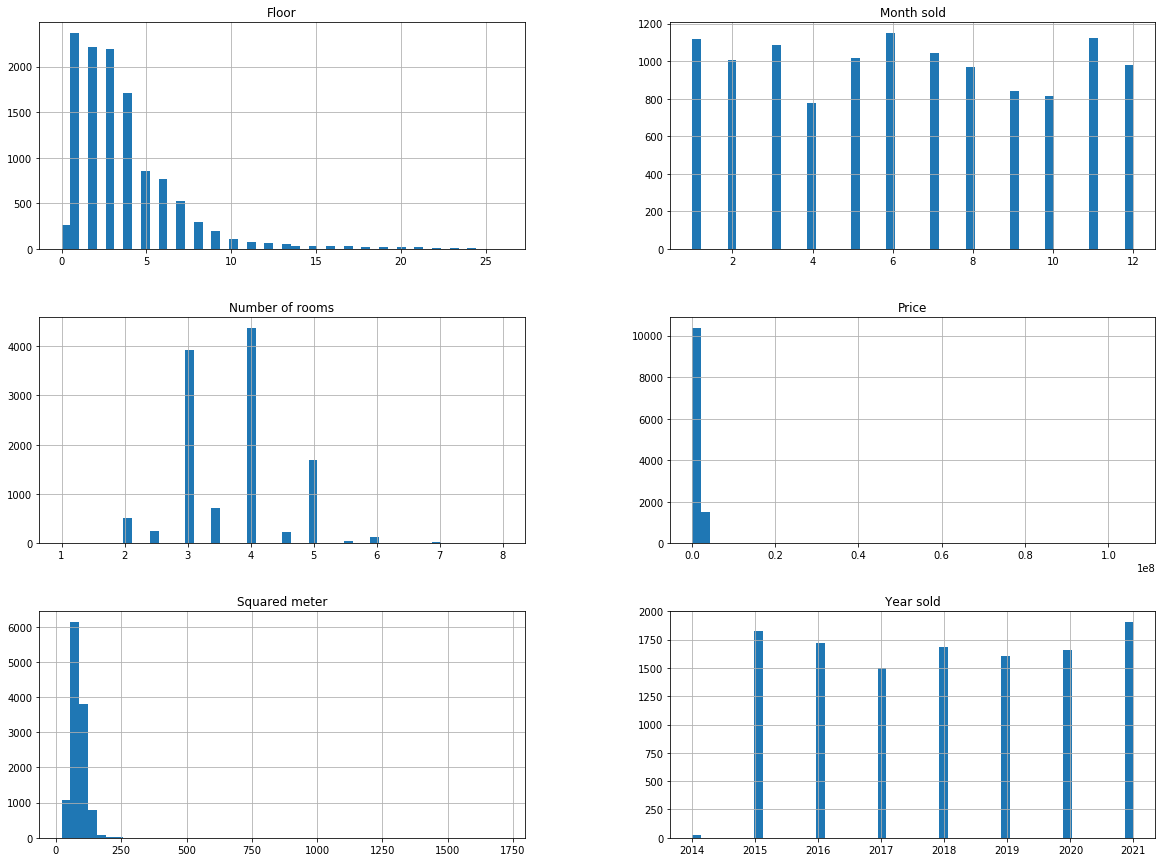

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
# cleaning outliers
df = df.loc[df['Year sold'] > 2014]
df = df.loc[df['Floor'] <= 10]
df = df.loc[(df['Number of rooms'] > 1) & (df['Number of rooms'] < 7)]
df = df.loc[df['Squared meter'] <= 300]
df = df.loc[df['Price'] < 10000000]

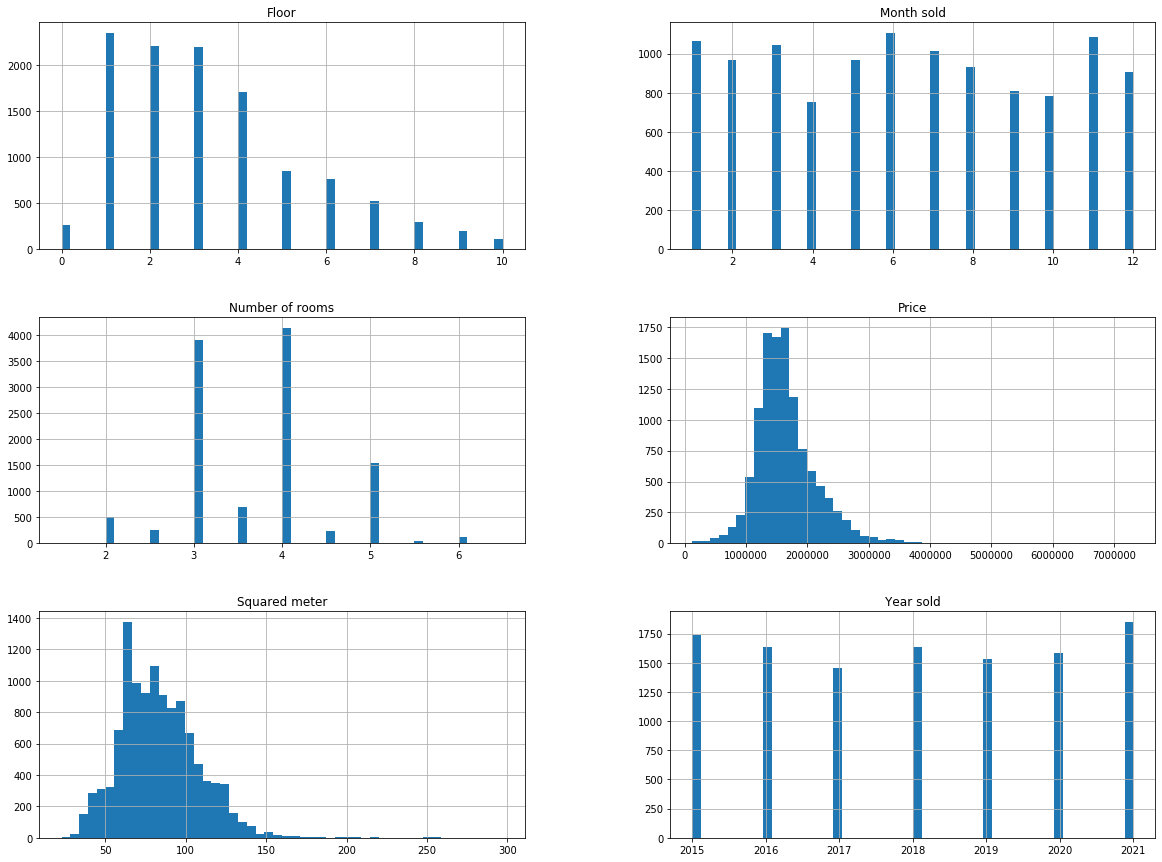

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# cleaning outliers again (more specific)
df = df.loc[df['Squared meter'] <= 150]
df = df.loc[df['Price'] < 4000000]

In [ ]:
# df = pd.get_dummies(df, columns = ['Street'], prefix = '', prefix_sep = '')

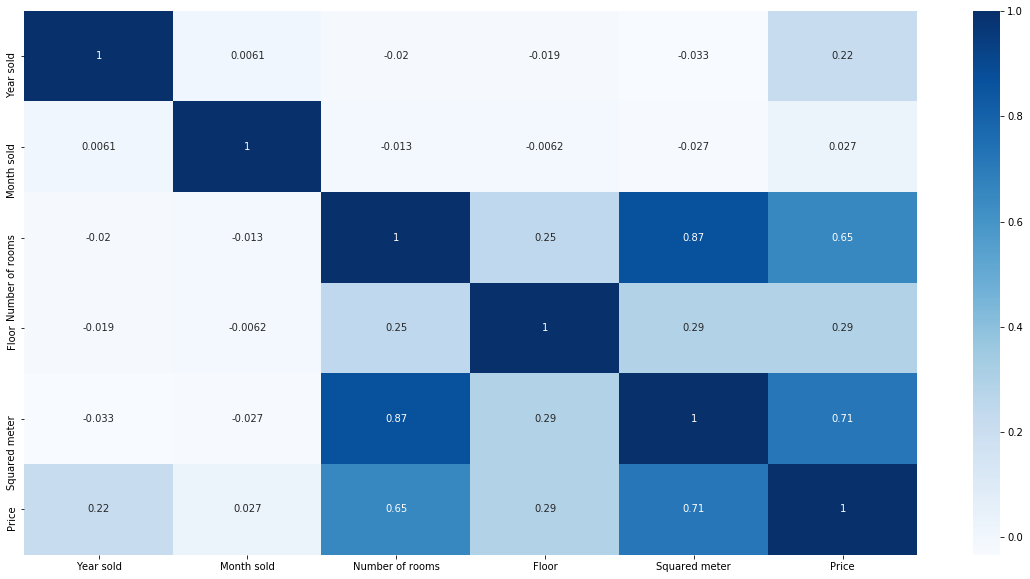

In [17]:
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

In [18]:
# as we can see from the correlation map,
# the Month sold and Price columns are almost not correlated at all.
# Therfore, we will drop the 'Month sold' column
df = df.drop('Month sold', axis=1)

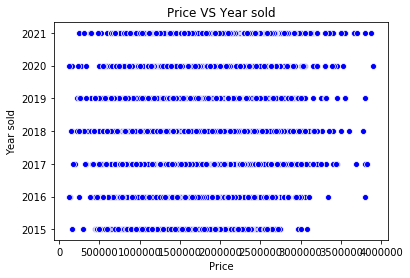

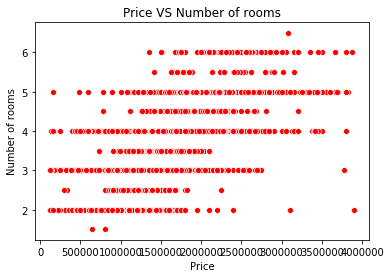

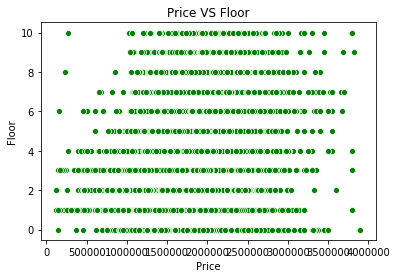

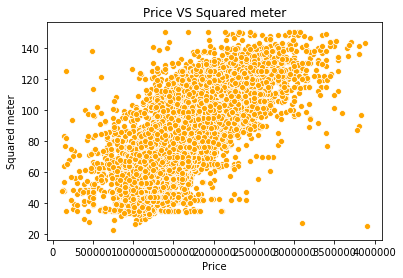

In [19]:
sb.scatterplot(x = df['Price'], y = df['Year sold'], color='blue')
plt.title("Price VS Year sold")
plt.show()

sb.scatterplot(x = df['Price'], y = df['Number of rooms'], color='red')
plt.title("Price VS Number of rooms")
plt.show()

sb.scatterplot(x = df['Price'], y = df['Floor'], color='green')
plt.title("Price VS Floor")
plt.show()

sb.scatterplot(x = df['Price'], y = df['Squared meter'], color='orange')
plt.title("Price VS Squared meter")
plt.show()

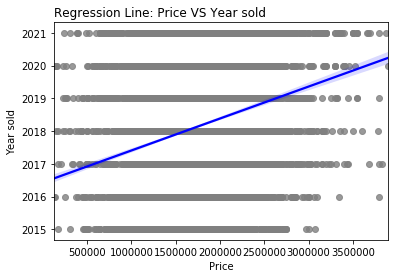

In [130]:
ax = sb.regplot(x="Price", y="Year sold", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "blue"})
ax.set_title("Regression Line: Price VS Year sold", color="black", loc='left');

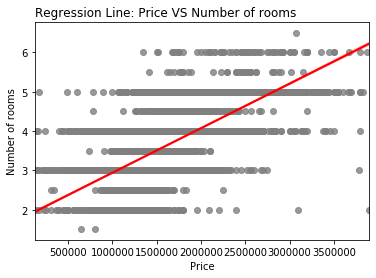

In [131]:
ax = sb.regplot(x="Price", y="Number of rooms", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "red"})
ax.set_title("Regression Line: Price VS Number of rooms", color="black", loc='left');

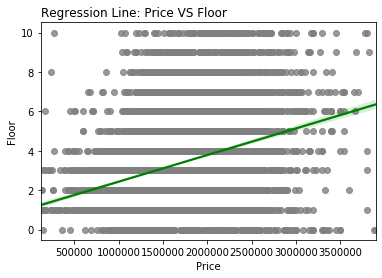

In [134]:
ax = sb.regplot(x="Price", y="Floor", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "green"})
ax.set_title("Regression Line: Price VS Floor", color="black", loc='left');

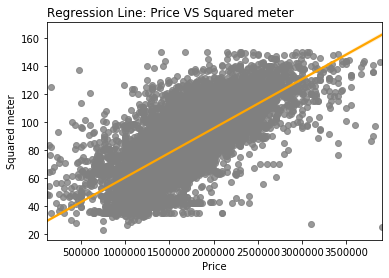

In [133]:
ax = sb.regplot(x="Price", y="Squared meter", data=df, fit_reg=True, scatter_kws={"color": "grey"}, line_kws={"color": "orange"})
ax.set_title("Regression Line: Price VS Squared meter", color="black", loc='left');

In [24]:
df.describe()

,Year sold,Number of rooms,Floor,Squared meter,Price
count,11328.000000,11328.000000,11328.000000,11328.000000,1.132800e+04
mean,2018.026042,3.658104,3.288312,82.725850,1.633301e+06
std,2.050723,0.802730,2.133249,22.870117,4.636351e+05
min,2015.000000,1.500000,0.000000,22.900000,1.200000e+05
25%,2016.000000,3.000000,2.000000,65.400000,1.337750e+06
50%,2018.000000,4.000000,3.000000,80.905000,1.575000e+06
75%,2020.000000,4.000000,4.000000,97.900000,1.850000e+06
max,2021.000000,6.500000,10.000000,150.000000,3.902000e+06


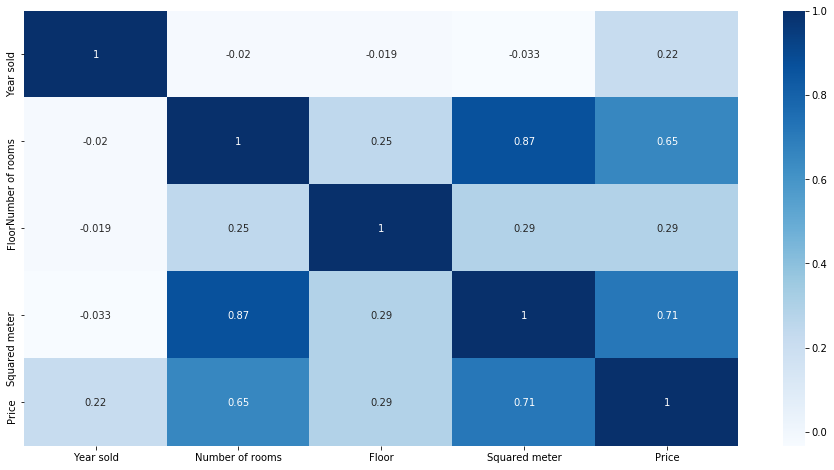

In [25]:
plt.figure(figsize=(16, 8))
sb.heatmap(df.corr(), cmap = 'Blues', annot=True);

In [26]:
df_without_street = df.drop('Street', axis=1)
df_with_street_dummies = pd.get_dummies(df, columns = ['Street'], prefix = '', prefix_sep = '')

In [27]:
df.head()

,Year sold,Street,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,נירים,1,6.0,6.0,134.60,3670000
1,2021,קרל נטר,1,3.0,3.0,81.00,1770000
2,2021,יהודה הלוי,1,5.0,5.0,120.00,2400000
3,2021,שרירא שמואל,1,4.0,2.0,64.32,2050000
4,2021,"תרמ""ב",1,3.0,3.0,80.98,1640000


In [28]:
df_without_street.head()

,Year sold,Kind,Number of rooms,Floor,Squared meter,Price
0,2021,1,6.0,6.0,134.60,3670000
1,2021,1,3.0,3.0,81.00,1770000
2,2021,1,5.0,5.0,120.00,2400000
3,2021,1,4.0,2.0,64.32,2050000
4,2021,1,3.0,3.0,80.98,1640000


In [29]:
df_with_street_dummies.head()

,Year sold,Kind,Number of rooms,Floor,Squared meter,Price,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
0,2021,1,6.0,6.0,134.60,3670000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,1,3.0,3.0,81.00,1770000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,1,5.0,5.0,120.00,2400000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,1,4.0,2.0,64.32,2050000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2021,1,3.0,3.0,80.98,1640000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
prices = df_without_street['Price']
data_without_prices = df_without_street.drop(['Price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(data_without_prices, prices, test_size=0.2, random_state = 7)

In [31]:
X_train

,Year sold,Kind,Number of rooms,Floor,Squared meter
3352,2020,1,5.0,4.0,120.36
5268,2018,1,3.0,3.0,72.00
4524,2019,1,6.0,5.0,148.00
4163,2019,1,4.0,8.0,94.00
7042,2017,1,3.0,3.0,55.68
...,...,...,...,...,...
4516,2019,1,5.0,10.0,121.00
5969,2018,1,3.0,3.0,63.43
11285,2015,1,4.0,2.0,89.31
550,2021,1,5.0,1.0,114.05


In [33]:
y_train

3352     3160000
5268     1330000
4524     2920000
4163     2340000
7042     1285000
          ...   
4516     2450000
5969     1280000
11285    1575000
550      2200000
9861     1050000
Name: Price, Length: 9062, dtype: int64

In [105]:
basic_scale = MinMaxScaler()
X_train = basic_scale.fit_transform(X_train)
X_test = basic_scale.transform(X_test)

In [70]:
# normalization
#lables = ['Year sold', 'Number of rooms', 'Floor', 'Squared meter']
#basic_scale = StandardScaler()
#X_train = basic_scale.fit_transform(X_train)
#X_test = basic_scale.transform(X_test)

In [118]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
initial_prediction = linear_reg.predict(X_test)

print("score: ",linear_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,initial_prediction))
print ("MSE: ",mean_squared_error(y_test,initial_prediction, squared=False))

score:  0.5917947348056305
r^2 score:  0.5917947348056305
MSE:  298167.8877129533


In [117]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train, y_train,cv=10,scoring="r2")

print("After cross validation\n")
print("R2 Score:",linear_reg_scores_r2.mean())
print ("MSE:",np.sqrt(-linear_reg_scores.mean()))

After cross validation:

R2 Score: 0.5882223705525224
MSE: 297173.6589924013


In [108]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
initial_prediction = rf_reg.predict(X_test)


print("score: ",rf_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,initial_prediction))
print ("MSE: ",mean_squared_error(y_test,initial_prediction))

score:  0.5760258331571997
r^2 score:  0.5760258331571997
MSE:  92338439476.85786


In [120]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

After cross validation

R2 Score: 0.551919008323799
Mean Square ERR: 309486.41736398946


In [109]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
initial_prediction = knn_reg.predict(X_test)

print("score: ",knn_reg.score(X_test,y_test))
print("r^2 score: ",metrics.r2_score(y_test,initial_prediction))
print ("MSE: ",mean_squared_error(y_test,initial_prediction))

score:  0.5438651751461088
r^2 score:  0.5438651751461088
MSE:  99342793056.7167


In [119]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-knn_reg_scores.mean()))

After cross validation

R2 Score: 0.5790682240738276
Mean Square ERR: 300311.5894049486


In [103]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
initial_prediction = log_reg.predict(X_test)


print(log_reg.score(X_test, y_test))
print (mean_squared_error(y_test,initial_prediction))

0.024271844660194174
130380724172.41837


In [ ]:
# Cross validation
log_reg_scores = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="neg_mean_squared_error")
log_reg_scores_r2 = cross_val_score(LogisticRegression(),X_train, y_train, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

In [110]:
prices1 = df_with_street_dummies['Price']
data_without_prices1 = df_with_street_dummies.drop(['Price'],axis=1)
X_train1,X_test1,y_train1,y_test1 = train_test_split(data_without_prices1, prices1, test_size=0.2, random_state = 7)

In [111]:
X_train1

,Year sold,Kind,Number of rooms,Floor,Squared meter,אבידן שמעון,אביעזר,אבן גבירול,אבן חן,אברבנאל,...,שפרינצק,שרירא שמואל,שרף חיים,תדהר דוד,תורה ועבודה,תל חי,תנועות הנוער,תנחום,"תרמ""ב",תרשיש
3352,2020,1,5.0,4.0,120.36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5268,2018,1,3.0,3.0,72.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4524,2019,1,6.0,5.0,148.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4163,2019,1,4.0,8.0,94.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7042,2017,1,3.0,3.0,55.68,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2019,1,5.0,10.0,121.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5969,2018,1,3.0,3.0,63.43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11285,2015,1,4.0,2.0,89.31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
550,2021,1,5.0,1.0,114.05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
num_features = ['Year sold', 'Number of rooms', 'Floor', 'Squared meter']
basic_scale = MinMaxScaler()
X_train1[num_features] = basic_scale.fit_transform(X_train1[num_features])
X_test1[num_features] = basic_scale.transform(X_test1[num_features])

In [114]:
linear_reg = LinearRegression()
linear_reg.fit(X_train1, y_train1)
initial_prediction = linear_reg.predict(X_test1)


print("score: ",linear_reg.score(X_test1,y_test1))
print("r^2 score: ",metrics.r2_score(y_test1,initial_prediction))
print ("MSE: ",mean_squared_error(y_test1,initial_prediction))

score:  -6.427450378509691e+21
r^2 score:  -6.427450378509691e+21
MSE:  1.3998511800521576e+33


In [123]:
# Cross validation
linear_reg_scores = cross_val_score(LinearRegression(), X_train1, y_train1, cv=10,scoring="neg_mean_squared_error")
linear_reg_scores_r2 = cross_val_score(LinearRegression(),X_train1, y_train1,cv=10,scoring="r2")

print("After cross validation\n")
print("R2 Score:",linear_reg_scores_r2.mean())
print ("MSE:",np.sqrt(-linear_reg_scores.mean()))

After cross validation

score:  -1.2648707729646841e+35
R2 Score: -5.892892364900902e+23
MSE: 3.5565021762466054e+17


In [113]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train1, y_train1)
initial_prediction = rf_reg.predict(X_test1)


print("score: ",rf_reg.score(X_test1,y_test1))
print("r^2 score: ",metrics.r2_score(y_test1,initial_prediction))
print ("MSE: ",mean_squared_error(y_test1,initial_prediction))

score:  0.6630444307926793
r^2 score:  0.6630444307926793
MSE:  73386432162.44989


In [124]:
# Cross validation
rf_reg_scores = cross_val_score(RandomForestRegressor(),X_train1, y_train1, cv=10, scoring="neg_mean_squared_error")
rf_reg_scores_r2 = cross_val_score(RandomForestRegressor(),X_train1, y_train1, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",rf_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-rf_reg_scores.mean()))

After cross validation

score:  -1.2648707729646841e+35
R2 Score: 0.6628512643143023
Mean Square ERR: 268606.864171569


In [115]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train1, y_train1)
initial_prediction = knn_reg.predict(X_test1)


print("score: ",knn_reg.score(X_test1,y_test1))
print("r^2 score: ",metrics.r2_score(y_test1,initial_prediction))
print ("MSE: ",mean_squared_error(y_test1,initial_prediction))

score:  0.6143739209004788
r^2 score:  0.6143739209004788
MSE:  83986509439.45789


In [125]:
# Cross validation
knn_reg_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train1, y_train1, cv=10, scoring="neg_mean_squared_error")
knn_reg_scores_r2 = cross_val_score(KNeighborsRegressor(n_neighbors=10),X_train1, y_train1, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",knn_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-knn_reg_scores.mean()))

After cross validation

score:  -86074988622.69032
R2 Score: 0.5980432393684906
Mean Square ERR: 293385.39265391236


In [100]:
log_reg = LogisticRegression()
log_reg.fit(X_train1, y_train1)
initial_prediction = log_reg.predict(X_test1)


print(log_reg.score(X_test1, y_test1))
print (mean_squared_error(y_test1,initial_prediction))

0.028684907325684024
108412403139.76169


In [128]:
# Cross validation
log_reg_scores = cross_val_score(LogisticRegression(),X_train1, y_train1, cv=10, scoring="neg_mean_squared_error")
log_reg_scores_r2 = cross_val_score(LogisticRegression(),X_train1, y_train1, cv=10, scoring="r2")

print("After cross validation\n")
print("R2 Score:",log_reg_scores_r2.mean())
print ("Mean Square ERR:",np.sqrt(-log_reg_scores.mean()))

After cross validation

score:  -110015270079.27939
R2 Score: 0.6628512643143023
Mean Square ERR: 268606.864171569
